In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [10]:
def load_data(filename):
    data = np.load(filename)
    X=data[:,0:-1]
    y=data[:,-1]
    return X,y

def standardize(image_data,axis=1):
    # Compute mean and std along axis 1, assuming each image is a row
    mean = np.mean(image_data, axis=axis, keepdims=True)
    std = np.std(image_data, axis=axis, keepdims=True)
    # Normalize each image
    scaled_images = (image_data - mean) / std
    return scaled_images


In [25]:
train = load_data('data/fashion_train.npy')
X = train[0]
X_standardized_rows = standardize(X,axis=1) # standardize the data by row (per-image standardization)
X_standardized_columns = standardize(X,axis=0) # standardize the data by column (per-feature standardization)
y = train[1]

### Principle Component Analysis

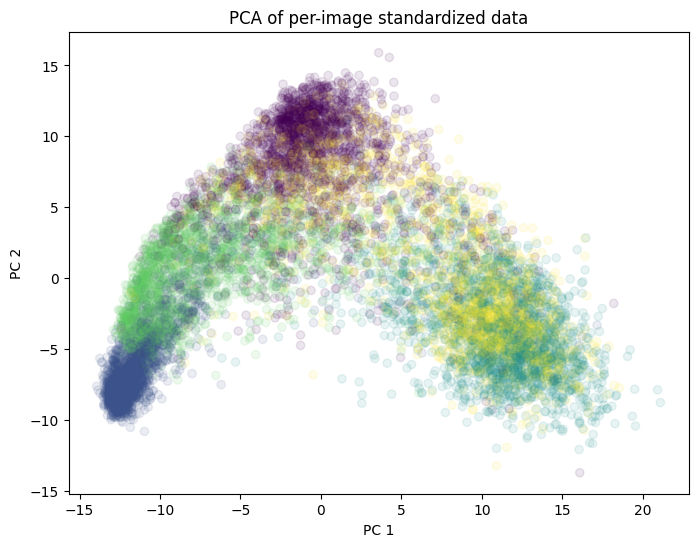

In [38]:
# Perform PCA right after per-image standardization, while also centering the data
pca = PCA(n_components=2)
X_standardized_rows_centered = X_standardized_rows - np.mean(X_standardized_rows, axis=0)
pca.fit(X_standardized_rows_centered)
score=pca.transform(X_standardized_rows_centered)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 1], c=y, cmap='viridis', alpha=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of per-image standardized data')
plt.show()

In [36]:
def parallel_analysis(data, n_simulations=100, percentile=95):
    # Center the data
    data_centered = data - np.mean(data, axis=0)
    
    # Compute eigenvalues from the actual data
    pca = PCA()
    pca.fit(data_centered)
    actual_eigenvalues = pca.explained_variance_
    
    # Generate random data and compute eigenvalues
    random_eigenvalues = np.zeros((n_simulations, data.shape[1]))
    for i in range(n_simulations):
        print(f"simulation {i}")
        random_data = np.random.normal(size=data.shape)
        pca.fit(random_data)
        random_eigenvalues[i, :] = pca.explained_variance_
    
    # Compute the specified percentile of the random eigenvalues
    random_threshold = np.percentile(random_eigenvalues, percentile, axis=0)
    
    # Determine the number of components where actual eigenvalues exceed random thresholds
    n_components = np.sum(actual_eigenvalues > random_threshold)
    
    return n_components

In [39]:
parallel_analysis(X_standardized_rows,n_simulations=100)

simulation 0
simulation 1
simulation 2
simulation 3
simulation 4
simulation 5
simulation 6
simulation 7
simulation 8
simulation 9
simulation 10
simulation 11
simulation 12
simulation 13
simulation 14
simulation 15
simulation 16
simulation 17
simulation 18
simulation 19
simulation 20
simulation 21
simulation 22
simulation 23
simulation 24
simulation 25
simulation 26
simulation 27
simulation 28
simulation 29
simulation 30
simulation 31
simulation 32
simulation 33
simulation 34
simulation 35
simulation 36
simulation 37
simulation 38
simulation 39
simulation 40
simulation 41
simulation 42
simulation 43
simulation 44
simulation 45
simulation 46
simulation 47
simulation 48
simulation 49
simulation 50
simulation 51
simulation 52
simulation 53
simulation 54
simulation 55
simulation 56
simulation 57
simulation 58
simulation 59
simulation 60
simulation 61
simulation 62
simulation 63
simulation 64
simulation 65
simulation 66
simulation 67
simulation 68
simulation 69
simulation 70
simulation 71
si

34